In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (8.0, 8.0), 'font.size': 18})
import numpy as np
from scipy.spatial.distance import cdist

def logistic_sigmoid(a):
    return 1 / (1 + np.exp(-a))

def rand_gauss(n, mu, cov):
    if cov.ndim == 1:
        cov = np.diag(cov)
    assert(mu.ndim == 1 and len(mu) == len(cov) and cov.ndim == 2 and cov.shape[0] == cov.shape[1])
    d, v = np.linalg.eigh(cov)
    return (np.random.randn(n, len(mu)) * np.sqrt(d)).dot(v) + mu

def logpdf_gauss(x, mu, cov):
    assert(mu.ndim == 1 and len(mu) == len(cov) and (cov.ndim == 1 or cov.shape[0] == cov.shape[1]))
    x = np.atleast_2d(x) - mu
    return -0.5*(len(mu)*np.log(2 * np.pi) + np.linalg.slogdet(cov)[1] + np.sum(x.dot(np.linalg.inv(cov)) * x, axis=1))
      
def plot2dfun(f, limits, resolution, ax=None):
    if ax is None:
        ax = plt
    xmin, xmax, ymin, ymax = limits
    xlim = np.arange(ymin, ymax, (ymax - ymin) / float(resolution))
    ylim = np.arange(xmin, xmax, (xmax - xmin) / float(resolution))
    a, b = np.meshgrid(ylim, xlim)
    img = f(np.vstack([np.ravel(a), np.ravel(b)[::-1]]).T)
    img = (img - img.min()) /(img.max() - img.min()) # normalize to range 0.0 - 1.0
    img = img.reshape(a.shape+img.shape[1:])
    return ax.imshow(img, cmap='gray', aspect='auto', extent=(xmin, xmax, ymin, ymax))

# K-nearest neighbours example

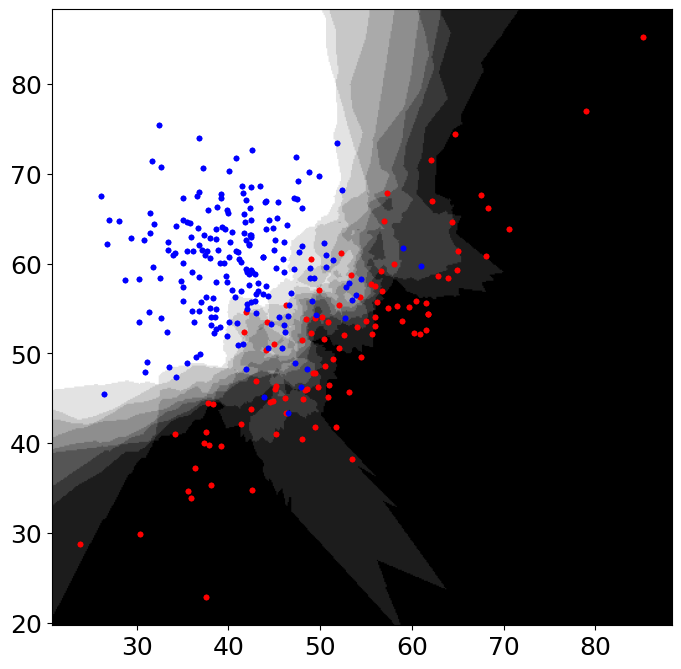

In [2]:
def k_nearest_neighbours(test_data, class1, class2, k):
    euclidean = cdist(np.r_[class1, class2], test_data)
    i = np.argsort(euclidean.T)
    return np.sum(i[:,:k] >= len(class1), axis=1) / float(k)


x1 = rand_gauss(100, np.array([50, 50]), np.array([[100, 70], [70, 100]]))
x2 = rand_gauss(200, np.array([40, 60]), np.array([[40, 0], [0, 40]]))
plt.plot(x1[:,0], x1[:,1], 'r.', x2[:,0], x2[:,1], 'b.')
ax = plt.axis()

k = 9

def soft_score(x):
  return k_nearest_neighbours(x, x1, x2, k)

def hard_decision(x):
  return (soft_score(x) > 0.5).astype(float)

plot2dfun(hard_decision, ax, 500)
plt.plot(x1[:,0], x1[:,1], 'r.', x2[:,0], x2[:,1], 'b.')

plot2dfun(soft_score, ax, 500)
plt.plot(x1[:,0], x1[:,1], 'r.', x2[:,0], x2[:,1], 'b.')


# Examples of 2D Multivariate Gaussian distribution

Text(0.5, 1.0, '$\\mu=\\binom{0.0}{0.0}\\Sigma=\\binom{4.0\\ \\ -0.8}{-0.8\\ \\ 1.0}$')

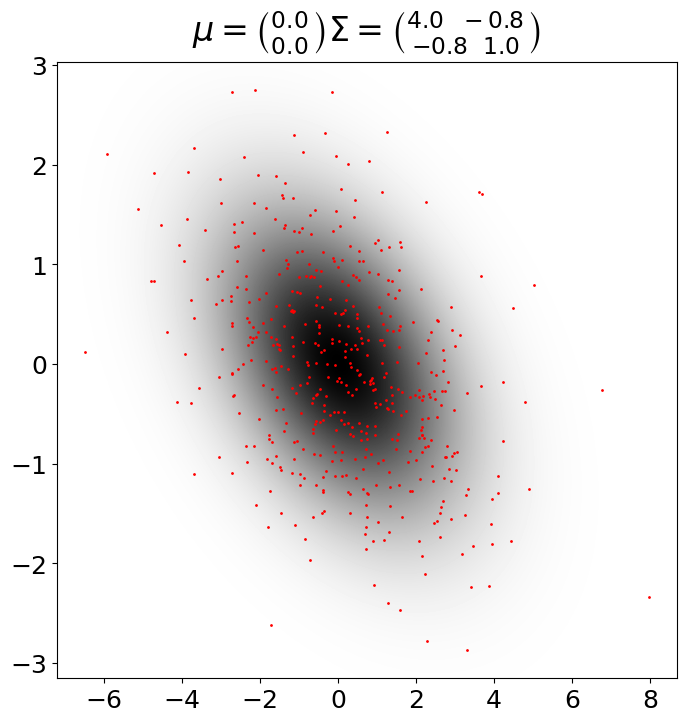

In [3]:
mu  = np.array([0.0, 0.0])
cov = np.array([[4.0, -0.8],
                [-0.8, 1.0]])
x = rand_gauss(500, mu, cov)
plt.plot(x[:,0], x[:,1], 'r.', markersize=2)
ax = plt.axis()

np.exp(logpdf_gauss(x, mu, cov))
plt.axis('equal')
plot2dfun(lambda x: 1-np.exp(logpdf_gauss(x, mu, cov)), ax, 500)
plt.title(r'$\mu=\binom{'+str(mu[0])+'}{'+str(mu[1])+r'}\Sigma=\binom{'+str(cov[0,0])+r'\ \ '+str(cov[0,1])+r'}{'+str(cov[1,0])+r'\ \ '+str(cov[1,1])+ r'}$', fontsize=24, pad=15)




# Example of Gaussian classifier

Text(0, 0.5, '$x_2$')

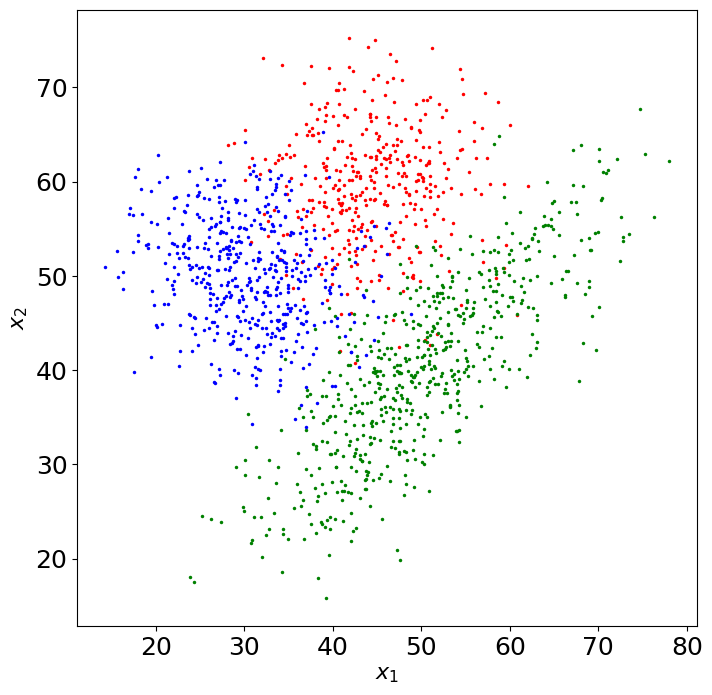

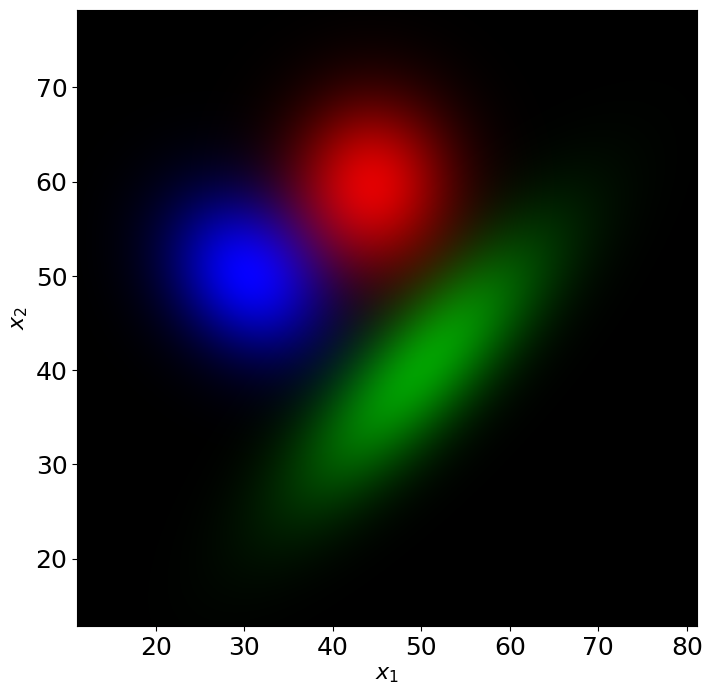

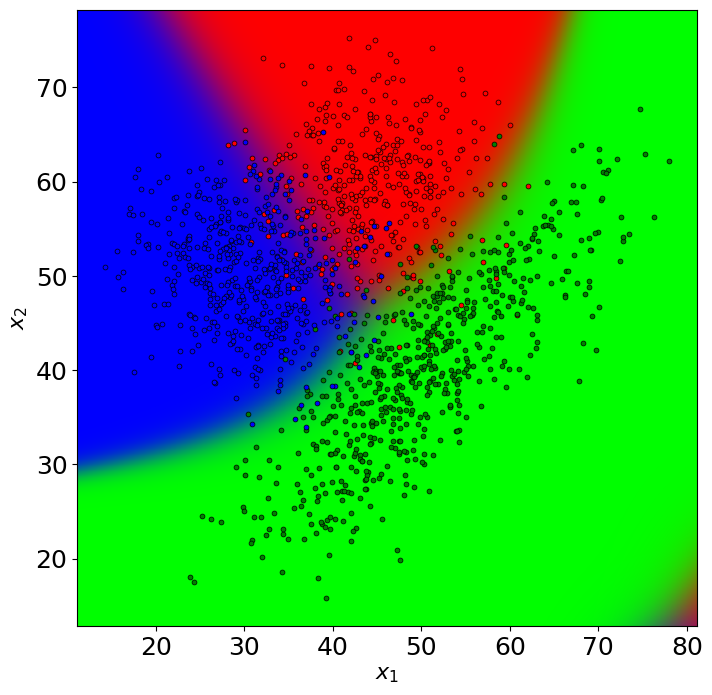

In [4]:
#Generate random data for classes x1, x2 and x3. The data for each class are
#generated from two gaussian distributions.
np.random.seed(0)
x1 = rand_gauss(400, np.array([45, 60]), np.array([[40, 0],   [0, 40]]))
x2 = rand_gauss(600, np.array([50, 40]), np.array([[100, 80], [80, 100]]))
x3 = rand_gauss(500, np.array([30, 50]), np.array([[40, -10], [-10, 40]]))

mus  = [np.mean(x, axis=0) for x in [x1, x2, x3]]
covs = [np.cov(x.T)       for x in [x1, x2, x3]]
N = np.array([len(x1), len(x2), len(x3)], dtype=float)
P = N/N.sum()

# Plot the data
plt.plot(x1[:,0], x1[:,1], 'r.', 
         x2[:,0], x2[:,1], 'g.',
         x3[:,0], x3[:,1], 'b.',
         markersize=5, markeredgecolor='w', markeredgewidth=0)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
ax = plt.axis()

plt.figure()

def pdfs_for_all_classes(x):
  return np.vstack([np.exp(logpdf_gauss(x, mu, cov)) for mu, cov in zip(mus, covs)]).T
  
plot2dfun(pdfs_for_all_classes, ax, 500)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)

# compute posterior probability for class X1
def x1_posterior(x):
  joint_prob = pdfs_for_all_classes(x) * P
  return  joint_prob / joint_prob.sum(axis=1, keepdims=True)


# Plot the data with the posterior probability as the background
plt.figure()
plot2dfun(x1_posterior, ax, 500)
plt.plot(x1[:,0], x1[:,1], 'r.', 
         x2[:,0], x2[:,1], 'g.',
         x3[:,0], x3[:,1], 'b.',
         markersize=7, markeredgecolor='k', markeredgewidth=0.5)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)


# Example Linear Regression


In [ ]:
def f(x):
  return np.cos(x) + 0.4*x + 1
N=100
x = np.random.rand(N)*10
t =  f(x)+np.random.randn(len(x))*0.3

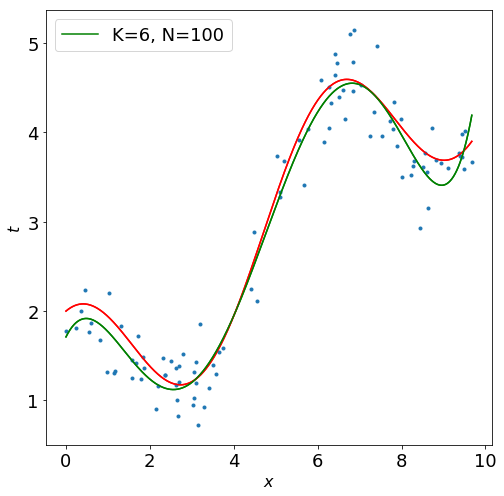

In [94]:
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$t$', fontsize=16)

K=6
xe = np.vstack([x**n for n in range(K+1)])
w = np.linalg.pinv(xe.T).dot(t)

xt = np.linspace(x.min(), x.max(), 1000)
xe = np.vstack([xt**n for n in range(K+1)])

plt.plot(xt, w.dot(xe), 'g')
plt.plot(xt, f(xt), 'r')
plt.plot(x, t, ls='', marker=".")
plt.plot(xt, f(xt), 'r')
plt.plot(xt, w.dot(xe), 'g')
plt.legend(['K='+str(K)+', N='+str(N)])


# Example Logistic Regression


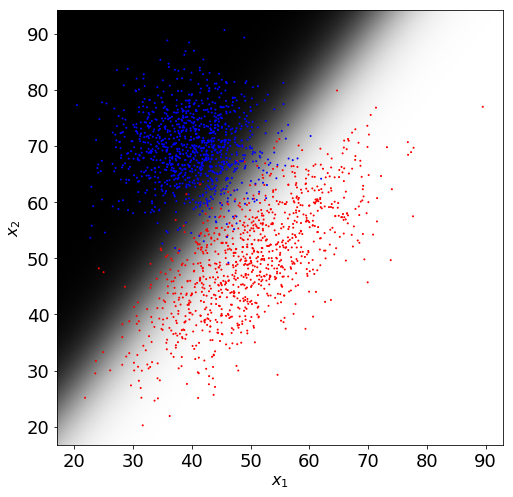

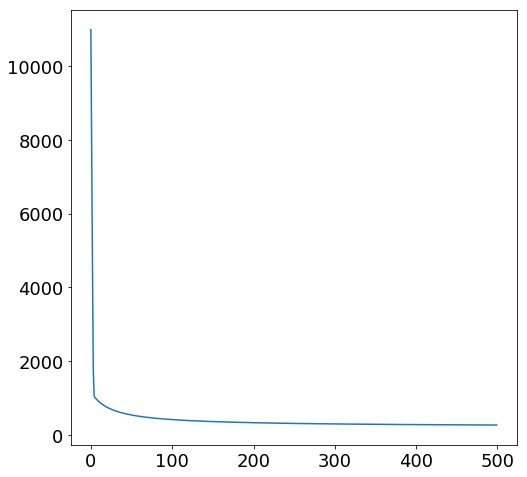

In [99]:
from IPython.display import clear_output
import time

red_data = rand_gauss(1000, np.array([50, 50]), np.array([[100,  70],
                                                          [ 70, 100]]))
blue_data = rand_gauss(1000, np.array([40, 70]), np.array([[40,  0],
                                                           [ 0, 40]]))

x = np.r_[red_data, blue_data]
t = np.r_[np.ones(len(red_data)), np.zeros(len(blue_data))]

w = np.array([0.1, 0.1])
w0 = 0.0
learning_rate = 0.001/len(x)

xentropy=[]
for i in range(500):
    y = logistic_sigmoid(x.dot(w) + w0)
    w = w - learning_rate * (y - t).dot(x)
    w0 = w0 - learning_rate * np.sum(y - t)
    xentropy.append(np.sum(-t*np.log(y) - (1-t)*np.log(1-y)))

    if not i % 10:
      clear_output(wait=True)
      plt.scatter(x[:,0], x[:,1], s=1, c=t, cmap='bwr')
      ax=plt.axis()
      plot2dfun(lambda x: logistic_sigmoid(x.dot(w) + w0), ax, 1000)
      plt.xlabel('$x_1$', fontsize=16)
      plt.ylabel('$x_2$', fontsize=16)
      plt.show()
      #time.sleep(0.5)

plt.plot(xentropy)